In [9]:
# Import statements
import os
import traceback
import pickle
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from LearningSession import *
from LearningChoicePredictor import *
from LearningPsychometricPredictor import *
import ssm

## Set up Data

In [10]:
animal = 'mSM63'
folder = '/home/chingf/engram/data/musall/learning/neural/mSM63'
dates = os.listdir(folder)
dates.sort()
dates = dates[1:]
dates.sort(key = lambda date: datetime.strptime(date, '%d-%b-%Y')) 

In [11]:
session = LearningSession(
    animal, dates[26], access_engram=True, load_Vc=False
    )

In [12]:
predictor = LearningPsychometricPredictor(session)

In [13]:
trial_choices = predictor.trial_choices
nonnan_choices = np.logical_not(np.isnan(trial_choices))
nonnan_data = np.ones((nonnan_choices.shape)).astype(bool)
for trial in range(predictor.data.shape[0]):
    if np.sum(np.isnan(predictor.data[trial,:])) > 0:
        nonnan_data[trial] = False
nonnan_indices = np.logical_and(nonnan_choices, nonnan_data)
y = trial_choices[nonnan_indices].astype(int) - 1
y = y.reshape((-1,1))
X = predictor.data[nonnan_indices,:]

In [14]:
indices = np.arange(y.size)
X_train, X_test, y_train, y_test, train_indices, test_indices = \
    train_test_split(
        X, y, indices, test_size = 0.20, stratify=y
        )

In [24]:
K = 2 # Number of states
D = 1 # Dimension of observations

## Bernoulli with SGD

In [ ]:
statedim_likelihoods = []
hmm = ssm.HMM(
    K, D, observations="bernoulli"
    )
lls = hmm.fit(
    y_train,
    method="sgd"
    )
statedim_likelihoods.append(max(lls))

> /home/chingf/Code/ExternalPackages/ssm/ssm/stats.py(523)bernoulli_logpdf()
-> return np.sum(lls * mask, axis=-1)
(Pdb) l
518  	    #
519  	    # This holds for any m. we choose m = max(0, u) to avoid overflow.
520  	    m = np.maximum(0, logit_ps)
521  	    lls = data * logit_ps - m - np.log(np.exp(-m) + np.exp(logit_ps - m))
522  	    import pdb; pdb.set_trace()
523  ->	    return np.sum(lls * mask, axis=-1)
524  	
525  	def logistic_logpdf(data, logit_ps, mask=None):
526  	    """
527  	    Compute the log probability density of a Bernoulli distribution.
528  	    This will broadcast as long as data and logit_ps have the same
(Pdb) x = lls*mask
(Pdb) x.shape
(332, 2, 1)
(Pdb) y = np.sum(lls*mask, axis=-1)
(Pdb) y.shape
(332, 2)
(Pdb) x[:3]
array([[[-6.90775528e+00],
        [-1.00050033e-03]],

       [[-1.00050033e-03],
        [-6.90775528e+00]],

       [[-6.90775528e+00],
        [-1.00050033e-03]]])
(Pdb) y[:3]
array([[-6.90775528e+00, -1.00050033e-03],
       [-1.00050033e-03

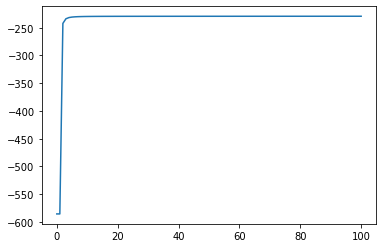

In [12]:
plt.plot(lls)

In [13]:
# Corresponding Bernoulli parameters for the classes
1/(1+np.exp(hmm.observations.logit_ps))

array([[0.87098476],
       [0.22809925]])

In [14]:
predicted = hmm.most_likely_states(y_test, input=X_test)

In [15]:
y_test.flatten()

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [16]:
predicted

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])